# H2HBABBA2668  -  JOEY  -   KRISHNENDU CHAKRABORTY (SRM IST KATTANKULATHUR CHENNAI)

In [1]:
#importing the packages Pandas and numpy
import pandas as pd

import numpy as np
from numpy import unique

from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

import seaborn as sns

import re

import matplotlib as mt
from matplotlib import style
from matplotlib import pyplot as plt

import datetime as dt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

pd. set_option('display.max_columns', 300) # or 1000.
pd. set_option('display.max_rows', 300) # or 1000.



In [2]:
#importing the dataset
data =  pd.read_csv(r'C:\Users\ASUS\Desktop\HUH\H2HBABBA2668.csv')
data.shape
#shows the total rows and columns

(50000, 19)

In [3]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200762301,C&S WH systems,NaN,2020.0,1.930715e+09,2020-03-29,20200328,20200329,20200602.0,USD,RV,1.0,NaN,7373.07,20200329.0,NAGD,1.930715e+09,1
1,U001,0200769623,WAL-MAR associates,2019-10-07 00:00:00,2019.0,1.929881e+09,2019-09-18,20190917,20190918,20191003.0,USD,RV,1.0,NaN,48793.56,20190918.0,NAH4,1.929881e+09,0
2,U001,0200899778,CTI us,2019-02-28 00:00:00,2019.0,1.928819e+09,2019-02-20,20190218,20190220,20190307.0,USD,RV,1.0,NaN,68088.60,20190220.0,NAA8,1.928819e+09,0
3,U001,0200769623,WAL-MAR in,NaN,2020.0,1.930577e+09,2020-02-29,20200228,20200229,20200315.0,USD,RV,1.0,NaN,19774.48,20200229.0,NAH4,1.930577e+09,1
4,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930822e+09,2020-04-27,20200424,20200427,20200512.0,USD,RV,1.0,NaN,294.17,20200427.0,NAH4,1.930822e+09,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [5]:
data.isnull().sum() #finding number of null values in a column of the table

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    5
isOpen                        0
dtype: int64

### droping the column having all null

In [6]:
data.drop('area_business',axis = 1, inplace=True)

In [7]:
data.shape

(50000, 18)

In [8]:
#dropping rows having null data in the columns clear_date and invoice_id 
#it will be if any of the two is missing drop that row as it wont help in predicting the next payment date
data.dropna(subset = ['invoice_id'], how="any").shape

(49995, 18)

In [9]:
data.dropna(subset = ['invoice_id'], how="any", inplace = True)

In [10]:
data.shape

(49995, 18)

# NULL REMOVAL IS DONE

In [11]:
print(data.nunique())
#number unique values in a column
#here we can also see that there is duplication in invoice id as total is 49995 and the unique values are only 48817. 
#this will be removed when removing duplication

business_code                 6
cust_number                1411
name_customer              4198
clear_date                  403
buisness_year                 2
doc_id                    48817
posting_date                500
document_create_date        503
document_create_date.1      500
due_in_date                 551
invoice_currency              2
document type                 1
posting_id                    1
total_open_amount         44265
baseline_create_date        507
cust_payment_terms           71
invoice_id                48817
isOpen                        2
dtype: int64


In [12]:
#dropping the columns having low unique values
data.drop('buisness_year',axis = 1, inplace=True)   
data.drop('invoice_currency',axis = 1, inplace=True)
data.drop('document type',axis = 1, inplace=True)
data.drop('posting_id',axis = 1, inplace=True)
#I am not removing the isOpen as it will state the state of the invoice paid or not

In [13]:
data.head()


,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200762301,C&S WH systems,NaN,1.930715e+09,2020-03-29,20200328,20200329,20200602.0,7373.07,20200329.0,NAGD,1.930715e+09,1
1,U001,0200769623,WAL-MAR associates,2019-10-07 00:00:00,1.929881e+09,2019-09-18,20190917,20190918,20191003.0,48793.56,20190918.0,NAH4,1.929881e+09,0
2,U001,0200899778,CTI us,2019-02-28 00:00:00,1.928819e+09,2019-02-20,20190218,20190220,20190307.0,68088.60,20190220.0,NAA8,1.928819e+09,0
3,U001,0200769623,WAL-MAR in,NaN,1.930577e+09,2020-02-29,20200228,20200229,20200315.0,19774.48,20200229.0,NAH4,1.930577e+09,1
4,U001,0200769623,WAL-MAR corporation,NaN,1.930822e+09,2020-04-27,20200424,20200427,20200512.0,294.17,20200427.0,NAH4,1.930822e+09,1


In [14]:
#duplicated entries
#printing duplicate entries
print(data[data.duplicated()])

      business_code cust_number        name_customer           clear_date  \
327            U001  0200744019                TARG   2019-03-13 00:00:00   
560            U001  0200744019             TARG llc  2020-01-24 00:00:00   
1137           U001  0200078795             H T H us  2019-05-14 00:00:00   
1359           CA02  0100030934  GROUPE  corporation  2020-02-13 00:00:00   
1679           U001      CCU013  KRAFT F corporation  2019-06-28 00:00:00   
...             ...         ...                  ...                  ...   
49855          CA02  0140104225  SAVE-ON- associates  2019-10-28 00:00:00   
49883          U001  0200769623             WAL-MAR   2019-12-02 00:00:00   
49894          U001  0200707822    PUBLI corporation  2019-08-19 00:00:00   
49947          U001  0200793568     SUPE corporation  2019-12-30 00:00:00   
49985          U001  0200707822     PUBLI foundation  2019-09-30 00:00:00   

             doc_id posting_date  document_create_date  \
327    1.928830e+

In [15]:
#to drop duplication in invoice id as it should be absolutely unique for each transaction
data.drop_duplicates(subset='invoice_id',keep='first').shape

(48817, 14)

In [16]:
print(data.nunique()) #Printing the unique values in all columns

business_code                 6
cust_number                1411
name_customer              4198
clear_date                  403
doc_id                    48817
posting_date                500
document_create_date        503
document_create_date.1      500
due_in_date                 551
total_open_amount         44265
baseline_create_date        507
cust_payment_terms           71
invoice_id                48817
isOpen                        2
dtype: int64


In [17]:
data.drop_duplicates(keep='first',inplace=True)
data.shape
#its just for cross confirming that there are no duplicates(rows) left

(48817, 14)

# DUPLICATE ROW DATA REMOVED

In [18]:
print(data[data.duplicated()])

Empty DataFrame
Columns: [business_code, cust_number, name_customer, clear_date, doc_id, posting_date, document_create_date, document_create_date.1, due_in_date, total_open_amount, baseline_create_date, cust_payment_terms, invoice_id, isOpen]
Index: []


# DATATIME CHANGES!!!

## changing the object or int or float type data to a date format 

In [19]:
data['baseline_create_date'] = pd.to_datetime(data['baseline_create_date'], format='%Y%m%d')


In [20]:
data['posting_date']=pd.to_datetime(data['posting_date'])

In [21]:
data['due_in_date'] = pd.to_datetime(data['due_in_date'], format='%Y%m%d')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48817 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           48817 non-null  object        
 1   cust_number             48817 non-null  object        
 2   name_customer           48817 non-null  object        
 3   clear_date              39126 non-null  object        
 4   doc_id                  48817 non-null  float64       
 5   posting_date            48817 non-null  datetime64[ns]
 6   document_create_date    48817 non-null  int64         
 7   document_create_date.1  48817 non-null  int64         
 8   due_in_date             48817 non-null  datetime64[ns]
 9   total_open_amount       48817 non-null  float64       
 10  baseline_create_date    48817 non-null  datetime64[ns]
 11  cust_payment_terms      48817 non-null  object        
 12  invoice_id              48817 non-null  float6

In [23]:
data['document_create_date'] = pd.to_datetime(data['document_create_date'], format='%Y%m%d')
data['document_create_date.1'] = pd.to_datetime(data['document_create_date.1'], format='%Y%m%d')
data['clear_date'] = pd.to_datetime(data['clear_date'])

In [24]:
data.head()

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200762301,C&S WH systems,NaT,1.930715e+09,2020-03-29,2020-03-28,2020-03-29,2020-06-02,7373.07,2020-03-29,NAGD,1.930715e+09,1
1,U001,0200769623,WAL-MAR associates,2019-10-07,1.929881e+09,2019-09-18,2019-09-17,2019-09-18,2019-10-03,48793.56,2019-09-18,NAH4,1.929881e+09,0
2,U001,0200899778,CTI us,2019-02-28,1.928819e+09,2019-02-20,2019-02-18,2019-02-20,2019-03-07,68088.60,2019-02-20,NAA8,1.928819e+09,0
3,U001,0200769623,WAL-MAR in,NaT,1.930577e+09,2020-02-29,2020-02-28,2020-02-29,2020-03-15,19774.48,2020-02-29,NAH4,1.930577e+09,1
4,U001,0200769623,WAL-MAR corporation,NaT,1.930822e+09,2020-04-27,2020-04-24,2020-04-27,2020-05-12,294.17,2020-04-27,NAH4,1.930822e+09,1


In [25]:
#Transposing the dataframe using transpose() method and checking whether any rows are duplicted
#that is indirectly checking weather any columns are duplicate or not
dtta=data.transpose()
print(dtta[dtta.duplicated()])
#here we can see that there are indeed 2 columns that are duplicate invoive_id and document_create_date.1

                                      0                    1      \
document_create_date.1  2020-03-29 00:00:00  2019-09-18 00:00:00   
invoice_id                     1930715169.0         1929880824.0   

                                      2                    3      \
document_create_date.1  2019-02-20 00:00:00  2020-02-29 00:00:00   
invoice_id                     1928819493.0         1930576642.0   

                                      4                    5      \
document_create_date.1  2020-04-27 00:00:00  2019-09-03 00:00:00   
invoice_id                     1930822271.0         1929827625.0   

                                      6                    7      \
document_create_date.1  2019-06-08 00:00:00  2020-04-04 00:00:00   
invoice_id                     1929458001.0         1930740957.0   

                                      8                    9      \
document_create_date.1  2019-08-31 00:00:00  2019-02-23 00:00:00   
invoice_id                     1929818776.0 

In [26]:
#dropping the duplicate rows(indirectly column) document_create_date.1 and invoice_id
dtta.drop_duplicates(keep='first',inplace=True)
dtta.shape

(12, 48817)

In [27]:
#implementing the change in the original dataset
data=dtta.transpose()

In [28]:
data.head()

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200762301,C&S WH systems,NaT,1930715169.0,2020-03-29,2020-03-28,2020-06-02,7373.07,2020-03-29,NAGD,1
1,U001,0200769623,WAL-MAR associates,2019-10-07,1929880824.0,2019-09-18,2019-09-17,2019-10-03,48793.56,2019-09-18,NAH4,0
2,U001,0200899778,CTI us,2019-02-28,1928819493.0,2019-02-20,2019-02-18,2019-03-07,68088.6,2019-02-20,NAA8,0
3,U001,0200769623,WAL-MAR in,NaT,1930576642.0,2020-02-29,2020-02-28,2020-03-15,19774.48,2020-02-29,NAH4,1
4,U001,0200769623,WAL-MAR corporation,NaT,1930822271.0,2020-04-27,2020-04-24,2020-05-12,294.17,2020-04-27,NAH4,1


In [29]:
#After all the preprocessing the total columns was skimmed from 19 to 11 and the total rows are skimmed from 50000 to 48817
data.shape

(48817, 12)

In [30]:
#Changinng the posting date from datetime to integer using .value and a lambda function
data['posting_date'] = data['posting_date'].apply(lambda x: x.value)

In [31]:
data.head()

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200762301,C&S WH systems,NaT,1930715169.0,1585440000000000000,2020-03-28,2020-06-02,7373.07,2020-03-29,NAGD,1
1,U001,0200769623,WAL-MAR associates,2019-10-07,1929880824.0,1568764800000000000,2019-09-17,2019-10-03,48793.56,2019-09-18,NAH4,0
2,U001,0200899778,CTI us,2019-02-28,1928819493.0,1550620800000000000,2019-02-18,2019-03-07,68088.6,2019-02-20,NAA8,0
3,U001,0200769623,WAL-MAR in,NaT,1930576642.0,1582934400000000000,2020-02-28,2020-03-15,19774.48,2020-02-29,NAH4,1
4,U001,0200769623,WAL-MAR corporation,NaT,1930822271.0,1587945600000000000,2020-04-24,2020-05-12,294.17,2020-04-27,NAH4,1


In [32]:
#Changinng the baseline create date from datetime to integer using .value and a lambda function
data['baseline_create_date'] = data['baseline_create_date'].apply(lambda x: x.value)

In [33]:
data.head()

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200762301,C&S WH systems,NaT,1930715169.0,1585440000000000000,2020-03-28,2020-06-02,7373.07,1585440000000000000,NAGD,1
1,U001,0200769623,WAL-MAR associates,2019-10-07,1929880824.0,1568764800000000000,2019-09-17,2019-10-03,48793.56,1568764800000000000,NAH4,0
2,U001,0200899778,CTI us,2019-02-28,1928819493.0,1550620800000000000,2019-02-18,2019-03-07,68088.6,1550620800000000000,NAA8,0
3,U001,0200769623,WAL-MAR in,NaT,1930576642.0,1582934400000000000,2020-02-28,2020-03-15,19774.48,1582934400000000000,NAH4,1
4,U001,0200769623,WAL-MAR corporation,NaT,1930822271.0,1587945600000000000,2020-04-24,2020-05-12,294.17,1587945600000000000,NAH4,1


In [34]:
#using coorelation method corr to findout the similarity between columns using the pearson method 
#here we can see that the baseline_create_date and the posting_date has a 99% similarity so we can drop the posting_date from the table
data.corr(method ='pearson')

,posting_date,baseline_create_date
posting_date,1.000000,0.999863
baseline_create_date,0.999863,1.000000


In [35]:
#dropping the baseline_create_date column
data.drop('baseline_create_date',axis = 1, inplace=True)

In [36]:
#Riverting back the dtype of posting date from int to datetime
data['posting_date'] = data['posting_date'].apply(pd.Timestamp)

In [37]:
data.head()

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms,isOpen
0,U001,0200762301,C&S WH systems,NaT,1930715169.0,2020-03-29,2020-03-28,2020-06-02,7373.07,NAGD,1
1,U001,0200769623,WAL-MAR associates,2019-10-07,1929880824.0,2019-09-18,2019-09-17,2019-10-03,48793.56,NAH4,0
2,U001,0200899778,CTI us,2019-02-28,1928819493.0,2019-02-20,2019-02-18,2019-03-07,68088.6,NAA8,0
3,U001,0200769623,WAL-MAR in,NaT,1930576642.0,2020-02-29,2020-02-28,2020-03-15,19774.48,NAH4,1
4,U001,0200769623,WAL-MAR corporation,NaT,1930822271.0,2020-04-27,2020-04-24,2020-05-12,294.17,NAH4,1


# ALL DATA PREPROCESSING IS DONE

# Splitting into TRAIN AND TEST DATA

In [38]:
#Training Data Based on the  column  isOpen = 0
train = data[data['isOpen']==0].copy()

In [39]:
train.shape

(39126, 11)

In [40]:
train.isnull().sum()  #We can see that there is no null values in train dataset as intended

business_code           0
cust_number             0
name_customer           0
clear_date              0
doc_id                  0
posting_date            0
document_create_date    0
due_in_date             0
total_open_amount       0
cust_payment_terms      0
isOpen                  0
dtype: int64

In [41]:
#Test Data Based on the column isOpen =1
test = data[data['isOpen']==1].copy()

In [42]:
test.shape

(9691, 11)

In [43]:
test.head()

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms,isOpen
0,U001,0200762301,C&S WH systems,NaT,1930715169.0,2020-03-29,2020-03-28,2020-06-02,7373.07,NAGD,1
3,U001,0200769623,WAL-MAR in,NaT,1930576642.0,2020-02-29,2020-02-28,2020-03-15,19774.48,NAH4,1
4,U001,0200769623,WAL-MAR corporation,NaT,1930822271.0,2020-04-27,2020-04-24,2020-05-12,294.17,NAH4,1
7,U001,0200769623,WAL-MAR us,NaT,1930740957.0,2020-04-04,2020-04-03,2020-04-19,32515.23,NAH4,1
10,U001,0100031704,DELHAIZE associates,NaT,1930803750.0,2020-04-20,2020-04-20,2020-05-05,85404.69,NAA8,1


In [44]:
#saving it as Test.csv
test.to_csv('Main_Test.csv')

In [45]:
#saving it as Train.csv
train.to_csv('Main_Train.csv')

In [46]:
#Creating a new column Target Column 
#That is The difference between the due_in_date and the clear_date 
#we store the difference in a new column named Due_By
train['Due_By'] = train['clear_date'] - train['due_in_date']
#Changing the data trpe of the Due_by column from timedelta64 to int
train["Due_By"] = (train["Due_By"]).dt.days

In [47]:
train.head()

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms,isOpen,Due_By
1,U001,0200769623,WAL-MAR associates,2019-10-07,1929880824.0,2019-09-18,2019-09-17,2019-10-03,48793.56,NAH4,0,4
2,U001,0200899778,CTI us,2019-02-28,1928819493.0,2019-02-20,2019-02-18,2019-03-07,68088.6,NAA8,0,-7
5,U001,0200974851,RESTA foundation,2019-09-18,1929827625.0,2019-09-03,2019-09-04,2019-09-18,9129.81,NAA8,0,0
6,U001,0200707822,PUBLI,2019-06-24,1929458001.0,2019-06-08,2019-06-08,2019-06-23,109829.32,NAA8,0,1
8,U001,0200769623,WAL-MAR llc,2019-09-11,1929818776.0,2019-08-31,2019-08-31,2019-09-15,53548.96,NAH4,0,-4


In [48]:
#Sorting the dataset in ascending order on the basis of posting_date
#this is done to ensure that the data that will go into training set is older 
#whereas the data in the validation set is comparitively newer
train = train.sort_values(by="posting_date")

In [49]:
train.head()

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms,isOpen,Due_By
2554,U001,0200769623,WAL-MAR co,2019-01-09,1928539778.0,2018-12-30,2018-12-29,2019-01-14,36727.27,NAH4,0,-5
42458,U001,0200707822,PUBLI llc,2019-01-14,1928532576.0,2018-12-30,2018-12-29,2019-01-14,108170.05,NAA8,0,0
45821,U001,0200769623,WAL-MAR,2019-01-09,1928540968.0,2018-12-30,2018-12-29,2019-01-14,7726.51,NAH4,0,-5
45913,U001,0200779719,FOOD 4 corp,2019-01-14,1928544557.0,2018-12-30,2018-12-30,2019-01-14,60265.28,NAA8,0,0
8040,U001,0200769623,WAL-MAR trust,2019-01-09,1928539779.0,2018-12-30,2018-12-29,2019-01-14,4445.93,NAH4,0,-5


# SPLITTING THE MAIN TRAIN INTO TRAIN TEST AND VALIDATION

In [50]:
x = train.drop('Due_By',axis=1)

#Setting the target value(column name) 
y = train['Due_By']

In [51]:
#splitting the train data into two part 70:30 split i.e 30% train data given to the intermediate test data set

X_train,X_inter_test,y_train,y_inter_test = train_test_split(x,y,test_size=0.3,random_state=0 , shuffle = False)

In [52]:
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

In [53]:

X_train.shape , X_val.shape , X_test.shape

((27388, 11), (5869, 11), (5869, 11))

# EDA

<AxesSubplot:xlabel='Due_By', ylabel='Density'>

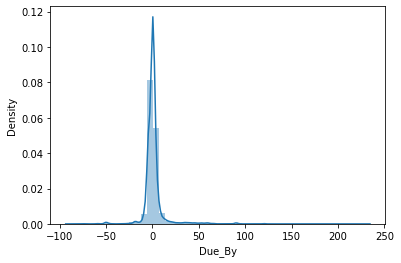

In [54]:
#Plotting the distribution plot for y_train thats a series
sns.distplot(y_train)
#Seeing the graph we can see the graph is Right Skewed 

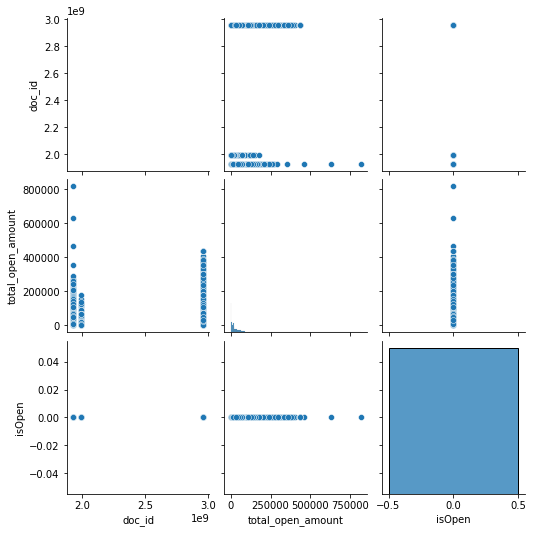

In [55]:
#Plotting the pair plot for the X_train
sns.pairplot(X_train)

In [56]:
X_train.describe()

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms,isOpen
count,27388,27388,27388,27388,2.738800e+04,27388,27388,27388,27388.0,27388,27388.0
unique,6,1218,3347,289,2.738800e+04,283,288,350,25179.0,63,1.0
top,U001,0200769623,WAL-MAR co,2019-10-15 00:00:00,1.929576e+09,2019-04-03 00:00:00,2019-04-03 00:00:00,2019-06-08 00:00:00,1897.5,NAA8,0.0
freq,24718,5863,643,275,1.000000e+00,180,173,185,71.0,10904,27388.0
first,NaN,NaN,NaN,2019-01-02 00:00:00,NaN,2018-12-30 00:00:00,2018-12-26 00:00:00,2018-10-27 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,2019-12-31 00:00:00,NaN,2019-10-08 00:00:00,2019-10-10 00:00:00,2020-01-25 00:00:00,NaN,NaN,NaN


In [57]:
#Adding the the series Due by to the main X_train dataset
X_train.merge(y_train,on = X_train.index)

,key_0,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms,isOpen,Due_By
0,2554,U001,0200769623,WAL-MAR co,2019-01-09,1928539778.0,2018-12-30,2018-12-29,2019-01-14,36727.27,NAH4,0,-5
1,42458,U001,0200707822,PUBLI llc,2019-01-14,1928532576.0,2018-12-30,2018-12-29,2019-01-14,108170.05,NAA8,0,0
2,45821,U001,0200769623,WAL-MAR,2019-01-09,1928540968.0,2018-12-30,2018-12-29,2019-01-14,7726.51,NAH4,0,-5
3,45913,U001,0200779719,FOOD 4 corp,2019-01-14,1928544557.0,2018-12-30,2018-12-30,2019-01-14,60265.28,NAA8,0,0
4,8040,U001,0200769623,WAL-MAR trust,2019-01-09,1928539779.0,2018-12-30,2018-12-29,2019-01-14,4445.93,NAH4,0,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27383,23323,U001,0200231309,SHERWO corp,2019-10-30,1929982033.0,2019-10-08,2019-10-07,2019-10-23,68497.04,NAA8,0,7
27384,2008,U001,0200759082,INGL systems,2019-10-25,1929989222.0,2019-10-08,2019-10-09,2019-10-23,57415.61,NAA8,0,2
27385,568,U001,0200744019,TARG llc,2019-10-23,1929950599.0,2019-10-08,2019-10-07,2019-10-23,10655.94,NAA8,0,0
27386,19044,U001,0200769623,WAL-MAR corporation,2019-10-21,1929974134.0,2019-10-08,2019-10-06,2019-10-23,47579.98,NAH4,0,-2


In [58]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27388 entries, 2554 to 49785
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         27388 non-null  object        
 1   cust_number           27388 non-null  object        
 2   name_customer         27388 non-null  object        
 3   clear_date            27388 non-null  datetime64[ns]
 4   doc_id                27388 non-null  object        
 5   posting_date          27388 non-null  datetime64[ns]
 6   document_create_date  27388 non-null  datetime64[ns]
 7   due_in_date           27388 non-null  datetime64[ns]
 8   total_open_amount     27388 non-null  object        
 9   cust_payment_terms    27388 non-null  object        
 10  isOpen                27388 non-null  object        
dtypes: datetime64[ns](4), object(7)
memory usage: 2.5+ MB


In [59]:
X_train.nunique()

business_code               6
cust_number              1218
name_customer            3347
clear_date                289
doc_id                  27388
posting_date              283
document_create_date      288
due_in_date               350
total_open_amount       25179
cust_payment_terms         63
isOpen                      1
dtype: int64

## Dropping the isOpen from the dataset X_ train ,val and test as It has only one unique value so it will hamper the prediction

In [60]:
X_train.drop(['isOpen'], axis=1, inplace = True)

In [61]:
 X_val.drop(['isOpen'], axis=1, inplace = True)

In [62]:
X_test.drop(['isOpen'], axis=1, inplace = True)

## Dropping the clear_date from the datasets X_ train , test and val as already the Due by is found

In [63]:
X_train.drop(['clear_date'], axis=1, inplace = True)
X_val.drop(['clear_date'], axis=1, inplace = True)
X_test.drop(['clear_date'], axis=1, inplace = True)

In [64]:
X_train.shape , X_val.shape , X_test.shape

((27388, 9), (5869, 9), (5869, 9))

## Changing the datatype of the doc_id in the datasets X_ train , test and val

In [65]:
X_train["doc_id"] = X_train["doc_id"].astype(float)
X_val["doc_id"] = X_val["doc_id"].astype(float)
X_test["doc_id"] = X_test["doc_id"].astype(float)

In [66]:
X_train.head()

,business_code,cust_number,name_customer,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms
2554,U001,0200769623,WAL-MAR co,1.928540e+09,2018-12-30,2018-12-29,2019-01-14,36727.27,NAH4
42458,U001,0200707822,PUBLI llc,1.928533e+09,2018-12-30,2018-12-29,2019-01-14,108170.05,NAA8
45821,U001,0200769623,WAL-MAR,1.928541e+09,2018-12-30,2018-12-29,2019-01-14,7726.51,NAH4
45913,U001,0200779719,FOOD 4 corp,1.928545e+09,2018-12-30,2018-12-30,2019-01-14,60265.28,NAA8
8040,U001,0200769623,WAL-MAR trust,1.928540e+09,2018-12-30,2018-12-29,2019-01-14,4445.93,NAH4


## Changing the datatype of the total_open_amount in the datasets X_ train , test and val

In [67]:
X_train["total_open_amount"] = X_train["total_open_amount"].astype(float)
X_val["total_open_amount"] = X_val["total_open_amount"].astype(float)
X_test["total_open_amount"] = X_test["total_open_amount"].astype(float)

In [68]:
X_train.head()

,business_code,cust_number,name_customer,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms
2554,U001,0200769623,WAL-MAR co,1.928540e+09,2018-12-30,2018-12-29,2019-01-14,36727.27,NAH4
42458,U001,0200707822,PUBLI llc,1.928533e+09,2018-12-30,2018-12-29,2019-01-14,108170.05,NAA8
45821,U001,0200769623,WAL-MAR,1.928541e+09,2018-12-30,2018-12-29,2019-01-14,7726.51,NAH4
45913,U001,0200779719,FOOD 4 corp,1.928545e+09,2018-12-30,2018-12-30,2019-01-14,60265.28,NAA8
8040,U001,0200769623,WAL-MAR trust,1.928540e+09,2018-12-30,2018-12-29,2019-01-14,4445.93,NAH4


## Changing the datatype of the cust_number in the datasets X_ train , test and val

In [69]:
#Replacing all occurances of alphabets and special characters with ''
X_train['cust_number'] = X_train['cust_number'].str.replace(r'[^\d.]+', '')
X_val['cust_number'] =  X_val['cust_number'].str.replace(r'[^\d.]+', '')
X_test['cust_number'] =  X_test['cust_number'].str.replace(r'[^\d.]+', '')

In [70]:
X_train["cust_number"] = X_train["cust_number"].astype(float)
X_val["cust_number"] = X_val["cust_number"].astype(float)
X_test["cust_number"] = X_test["cust_number"].astype(float)

In [71]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27388 entries, 2554 to 49785
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         27388 non-null  object        
 1   cust_number           27388 non-null  float64       
 2   name_customer         27388 non-null  object        
 3   doc_id                27388 non-null  float64       
 4   posting_date          27388 non-null  datetime64[ns]
 5   document_create_date  27388 non-null  datetime64[ns]
 6   due_in_date           27388 non-null  datetime64[ns]
 7   total_open_amount     27388 non-null  float64       
 8   cust_payment_terms    27388 non-null  object        
dtypes: datetime64[ns](3), float64(3), object(3)
memory usage: 2.1+ MB


# LABEL ENCODING

## Encoding is done to change the datatypes of columns having dtypes as object datatime String to int or float

## This is done because the model only accepts int and float and no other data types

In [72]:
X_train['business_code']

2554     U001
42458    U001
45821    U001
45913    U001
8040     U001
         ... 
23323    U001
2008     U001
568      U001
19044    U001
49785    CA02
Name: business_code, Length: 27388, dtype: object

In [73]:
from sklearn.preprocessing import LabelEncoder          #Importing the Label Encoder
label = LabelEncoder()
label.fit(X_train['business_code'])

#ENCODING the business_code
X_train['business_encode'] = label.transform(X_train['business_code'])
X_val['business_encode'] = label.transform(X_val['business_code'])
X_test['business_encode'] = label.transform(X_test['business_code'])


In [74]:
X_train.head()

,business_code,cust_number,name_customer,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms,business_encode
2554,U001,200769623.0,WAL-MAR co,1.928540e+09,2018-12-30,2018-12-29,2019-01-14,36727.27,NAH4,1
42458,U001,200707822.0,PUBLI llc,1.928533e+09,2018-12-30,2018-12-29,2019-01-14,108170.05,NAA8,1
45821,U001,200769623.0,WAL-MAR,1.928541e+09,2018-12-30,2018-12-29,2019-01-14,7726.51,NAH4,1
45913,U001,200779719.0,FOOD 4 corp,1.928545e+09,2018-12-30,2018-12-30,2019-01-14,60265.28,NAA8,1
8040,U001,200769623.0,WAL-MAR trust,1.928540e+09,2018-12-30,2018-12-29,2019-01-14,4445.93,NAH4,1


In [75]:
#After encoding we dont need the original business_code column so just drop it from all X_datasets
X_train.drop(['business_code'], axis=1, inplace = True)
X_val.drop(['business_code'], axis=1, inplace = True)
X_test.drop(['business_code'], axis=1, inplace = True)

In [76]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27388 entries, 2554 to 49785
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   cust_number           27388 non-null  float64       
 1   name_customer         27388 non-null  object        
 2   doc_id                27388 non-null  float64       
 3   posting_date          27388 non-null  datetime64[ns]
 4   document_create_date  27388 non-null  datetime64[ns]
 5   due_in_date           27388 non-null  datetime64[ns]
 6   total_open_amount     27388 non-null  float64       
 7   cust_payment_terms    27388 non-null  object        
 8   business_encode       27388 non-null  int32         
dtypes: datetime64[ns](3), float64(3), int32(1), object(2)
memory usage: 2.0+ MB


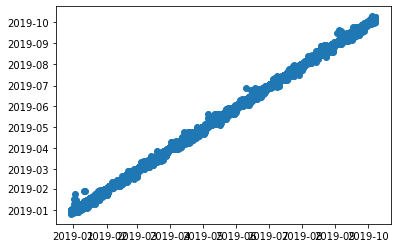

In [77]:
plt.plot_date(X_train['posting_date'],X_train['document_create_date']) 
#posting and create document date are almost same as it is a straight line

In [78]:
#Dropping the document_create_data as it is same as posting date 
X_train.drop(['document_create_date'], axis=1, inplace = True)
X_val.drop(['document_create_date'], axis=1, inplace = True)
X_test.drop(['document_create_date'], axis=1, inplace = True)

In [79]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27388 entries, 2554 to 49785
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   cust_number         27388 non-null  float64       
 1   name_customer       27388 non-null  object        
 2   doc_id              27388 non-null  float64       
 3   posting_date        27388 non-null  datetime64[ns]
 4   due_in_date         27388 non-null  datetime64[ns]
 5   total_open_amount   27388 non-null  float64       
 6   cust_payment_terms  27388 non-null  object        
 7   business_encode     27388 non-null  int32         
dtypes: datetime64[ns](2), float64(3), int32(1), object(2)
memory usage: 1.8+ MB


In [80]:
name_enc = LabelEncoder()




In [81]:
#Encoding the name_customer column
X_train['name_enc']=name_enc.fit_transform(X_train['name_customer'])
X_val['name_enc']=name_enc.fit_transform(X_val['name_customer'])
X_test['name_enc']=name_enc.fit_transform(X_test['name_customer'])

In [82]:
cust_payment_terms_enc = LabelEncoder()

In [83]:
#Encoding the customer_payment_terms column
X_train['cust_payment_terms_enc']=cust_payment_terms_enc.fit_transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=cust_payment_terms_enc.fit_transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=cust_payment_terms_enc.fit_transform(X_test['cust_payment_terms'])

In [84]:
X_train.head()

,cust_number,name_customer,doc_id,posting_date,due_in_date,total_open_amount,cust_payment_terms,business_encode,name_enc,cust_payment_terms_enc
2554,200769623.0,WAL-MAR co,1.928540e+09,2018-12-30,2019-01-14,36727.27,NAH4,1,3246,32
42458,200707822.0,PUBLI llc,1.928533e+09,2018-12-30,2019-01-14,108170.05,NAA8,1,2411,20
45821,200769623.0,WAL-MAR,1.928541e+09,2018-12-30,2019-01-14,7726.51,NAH4,1,3244,32
45913,200779719.0,FOOD 4 corp,1.928545e+09,2018-12-30,2019-01-14,60265.28,NAA8,1,1049,20
8040,200769623.0,WAL-MAR trust,1.928540e+09,2018-12-30,2019-01-14,4445.93,NAH4,1,3253,32


In [85]:
#Dropping the original name_customer
X_train.drop(['name_customer'], axis=1, inplace = True)
X_val.drop(['name_customer'], axis=1, inplace = True)
X_test.drop(['name_customer'], axis=1, inplace = True)

#Dropping the original cust_payment_terms
X_train.drop(['cust_payment_terms'], axis=1, inplace = True)
X_val.drop(['cust_payment_terms'], axis=1, inplace = True)
X_test.drop(['cust_payment_terms'], axis=1, inplace = True)

In [86]:
X_train.head()

,cust_number,doc_id,posting_date,due_in_date,total_open_amount,business_encode,name_enc,cust_payment_terms_enc
2554,200769623.0,1.928540e+09,2018-12-30,2019-01-14,36727.27,1,3246,32
42458,200707822.0,1.928533e+09,2018-12-30,2019-01-14,108170.05,1,2411,20
45821,200769623.0,1.928541e+09,2018-12-30,2019-01-14,7726.51,1,3244,32
45913,200779719.0,1.928545e+09,2018-12-30,2019-01-14,60265.28,1,1049,20
8040,200769623.0,1.928540e+09,2018-12-30,2019-01-14,4445.93,1,3253,32


In [87]:
X_train.info() #we can see after encoding all objects types are changed to either float orr int 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27388 entries, 2554 to 49785
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   cust_number             27388 non-null  float64       
 1   doc_id                  27388 non-null  float64       
 2   posting_date            27388 non-null  datetime64[ns]
 3   due_in_date             27388 non-null  datetime64[ns]
 4   total_open_amount       27388 non-null  float64       
 5   business_encode         27388 non-null  int32         
 6   name_enc                27388 non-null  int32         
 7   cust_payment_terms_enc  27388 non-null  int32         
dtypes: datetime64[ns](2), float64(3), int32(3)
memory usage: 1.6 MB


In [88]:
#Making new columns extracting the posting_date week day,day,month and year  
X_train['posting_week_day'] = X_train['posting_date'].dt.weekday 
X_train['posting_day'] = X_train['posting_date'].dt.day
X_train['posting_month'] = X_train['posting_date'].dt.month
X_train['posting_year'] = X_train['posting_date'].dt.year

#Making new columns extracting the due_in_date week day,day,month and year  
X_train['due_week_day'] = X_train['due_in_date'].dt.weekday 
X_train['due_day'] = X_train['due_in_date'].dt.day
X_train['due_month'] = X_train['due_in_date'].dt.month
X_train['due_year'] = X_train['due_in_date'].dt.year

#Making new columns extracting the posting_date week day,day,month and year  
X_val['posting_week_day'] = X_val['posting_date'].dt.weekday 
X_val['posting_day'] = X_val['posting_date'].dt.day
X_val['posting_month'] = X_val['posting_date'].dt.month
X_val['posting_year'] = X_val['posting_date'].dt.year

#Making new columns extracting the due_in_date week day,day,month and year
X_val['due_week_day'] = X_val['due_in_date'].dt.weekday
X_val['due_day'] = X_val['due_in_date'].dt.day
X_val['due_month'] = X_val['due_in_date'].dt.month
X_val['due_year'] = X_val['due_in_date'].dt.year

#Making new columns extracting the posting_date week day,day,month and year  
X_test['posting_week_day'] = X_test['posting_date'].dt.weekday 
X_test['posting_day'] = X_test['posting_date'].dt.day
X_test['posting_month'] = X_test['posting_date'].dt.month
X_test['posting_year'] = X_test['posting_date'].dt.year

#Making new columns extracting the due_in_date week day,day,month and year
X_test['due_week_day'] = X_test['due_in_date'].dt.weekday
X_test['due_day'] = X_test['due_in_date'].dt.day
X_test['due_month'] = X_test['due_in_date'].dt.month
X_test['due_year'] = X_test['due_in_date'].dt.year






In [89]:
X_train.head()

,cust_number,doc_id,posting_date,due_in_date,total_open_amount,business_encode,name_enc,cust_payment_terms_enc,posting_week_day,posting_day,posting_month,posting_year,due_week_day,due_day,due_month,due_year
2554,200769623.0,1.928540e+09,2018-12-30,2019-01-14,36727.27,1,3246,32,6,30,12,2018,0,14,1,2019
42458,200707822.0,1.928533e+09,2018-12-30,2019-01-14,108170.05,1,2411,20,6,30,12,2018,0,14,1,2019
45821,200769623.0,1.928541e+09,2018-12-30,2019-01-14,7726.51,1,3244,32,6,30,12,2018,0,14,1,2019
45913,200779719.0,1.928545e+09,2018-12-30,2019-01-14,60265.28,1,1049,20,6,30,12,2018,0,14,1,2019
8040,200769623.0,1.928540e+09,2018-12-30,2019-01-14,4445.93,1,3253,32,6,30,12,2018,0,14,1,2019


In [90]:
#Dropping the original posting_date
X_train.drop(['posting_date'], axis=1, inplace = True)
X_val.drop(['posting_date'], axis=1, inplace = True)
X_test.drop(['posting_date'], axis=1, inplace = True)

#Dropping the original due_in_date
X_train.drop(['due_in_date'], axis=1, inplace = True)
X_val.drop(['due_in_date'], axis=1, inplace = True)
X_test.drop(['due_in_date'], axis=1, inplace = True)


In [91]:
X_train.info()  #We can see all datatypes are changed to either float or int

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27388 entries, 2554 to 49785
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             27388 non-null  float64
 1   doc_id                  27388 non-null  float64
 2   total_open_amount       27388 non-null  float64
 3   business_encode         27388 non-null  int32  
 4   name_enc                27388 non-null  int32  
 5   cust_payment_terms_enc  27388 non-null  int32  
 6   posting_week_day        27388 non-null  int64  
 7   posting_day             27388 non-null  int64  
 8   posting_month           27388 non-null  int64  
 9   posting_year            27388 non-null  int64  
 10  due_week_day            27388 non-null  int64  
 11  due_day                 27388 non-null  int64  
 12  due_month               27388 non-null  int64  
 13  due_year                27388 non-null  int64  
dtypes: float64(3), int32(3), int64(8)
m

# ENCODING DONE !!

# FEATURE SELECTION

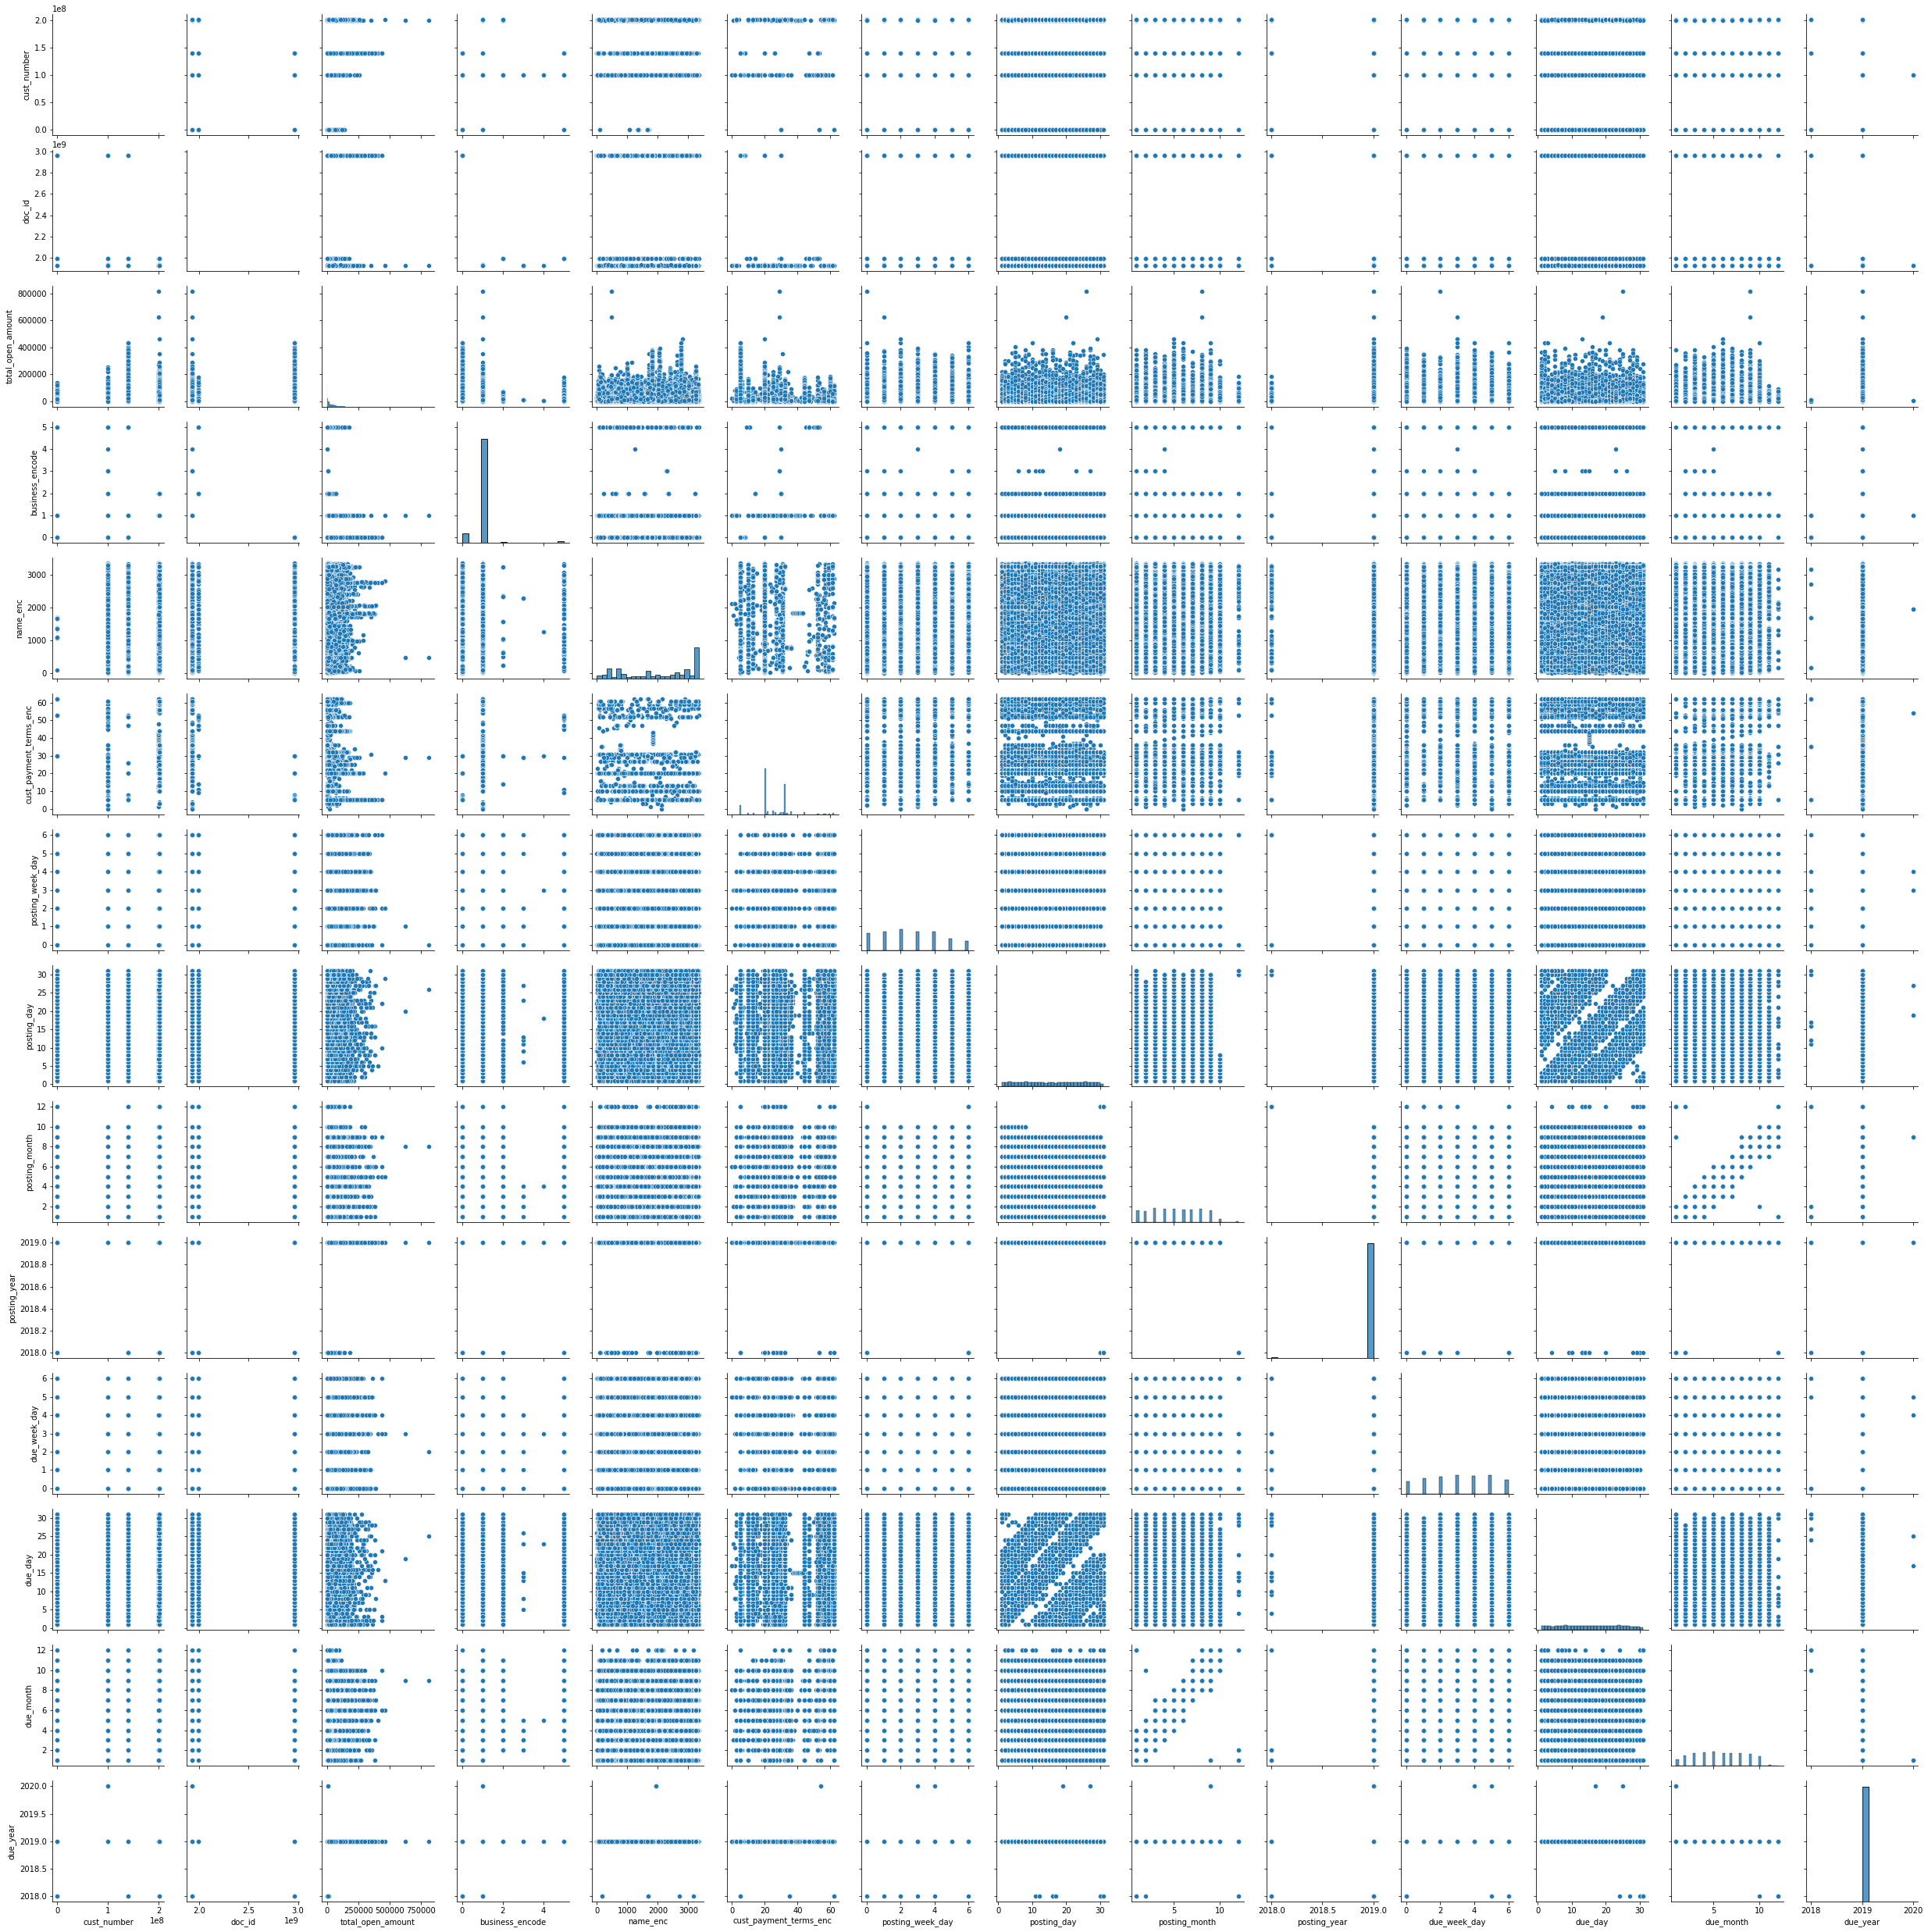

In [92]:
sns.pairplot(X_train)

In [93]:
X_train.describe()
#Gived the info about percentile , max, colunt mean etc

,cust_number,doc_id,total_open_amount,business_encode,name_enc,cust_payment_terms_enc,posting_week_day,posting_day,posting_month,posting_year,due_week_day,due_day,due_month,due_year
count,2.738800e+04,2.738800e+04,27388.000000,27388.000000,27388.000000,27388.000000,27388.000000,27388.000000,27388.000000,27388.000000,27388.000000,27388.000000,27388.000000,27388.000000
mean,1.847888e+08,2.013018e+09,31984.050344,0.976851,2030.162224,25.174566,2.655287,15.683767,5.213999,2018.994304,3.090441,15.707609,5.723054,2018.999817
std,4.253925e+07,2.798082e+08,40160.528567,0.542808,1124.026960,10.718369,1.820801,8.906160,2.669464,0.075257,1.889013,8.621491,2.682124,0.018127
min,1.000000e+00,1.928483e+09,0.220000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2018.000000,0.000000,1.000000,1.000000,2018.000000
25%,2.004666e+08,1.928997e+09,4558.495000,1.000000,803.000000,20.000000,1.000000,8.000000,3.000000,2019.000000,2.000000,8.000000,4.000000,2019.000000
50%,2.007599e+08,1.929422e+09,17213.835000,1.000000,2313.000000,20.000000,3.000000,16.000000,5.000000,2019.000000,3.000000,16.000000,6.000000,2019.000000
75%,2.007696e+08,1.929769e+09,46305.000000,1.000000,3244.000000,32.000000,4.000000,23.000000,7.000000,2019.000000,5.000000,23.000000,8.000000,2019.000000
max,2.009990e+08,2.960585e+09,816385.810000,5.000000,3346.000000,62.000000,6.000000,31.000000,12.000000,2019.000000,6.000000,31.000000,12.000000,2020.000000


array([[<AxesSubplot:title={'center':'cust_number'}>,
        <AxesSubplot:title={'center':'doc_id'}>,
        <AxesSubplot:title={'center':'total_open_amount'}>,
        <AxesSubplot:title={'center':'business_encode'}>],
       [<AxesSubplot:title={'center':'name_enc'}>,
        <AxesSubplot:title={'center':'cust_payment_terms_enc'}>,
        <AxesSubplot:title={'center':'posting_week_day'}>,
        <AxesSubplot:title={'center':'posting_day'}>],
       [<AxesSubplot:title={'center':'posting_month'}>,
        <AxesSubplot:title={'center':'posting_year'}>,
        <AxesSubplot:title={'center':'due_week_day'}>,
        <AxesSubplot:title={'center':'due_day'}>],
       [<AxesSubplot:title={'center':'due_month'}>,
        <AxesSubplot:title={'center':'due_year'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

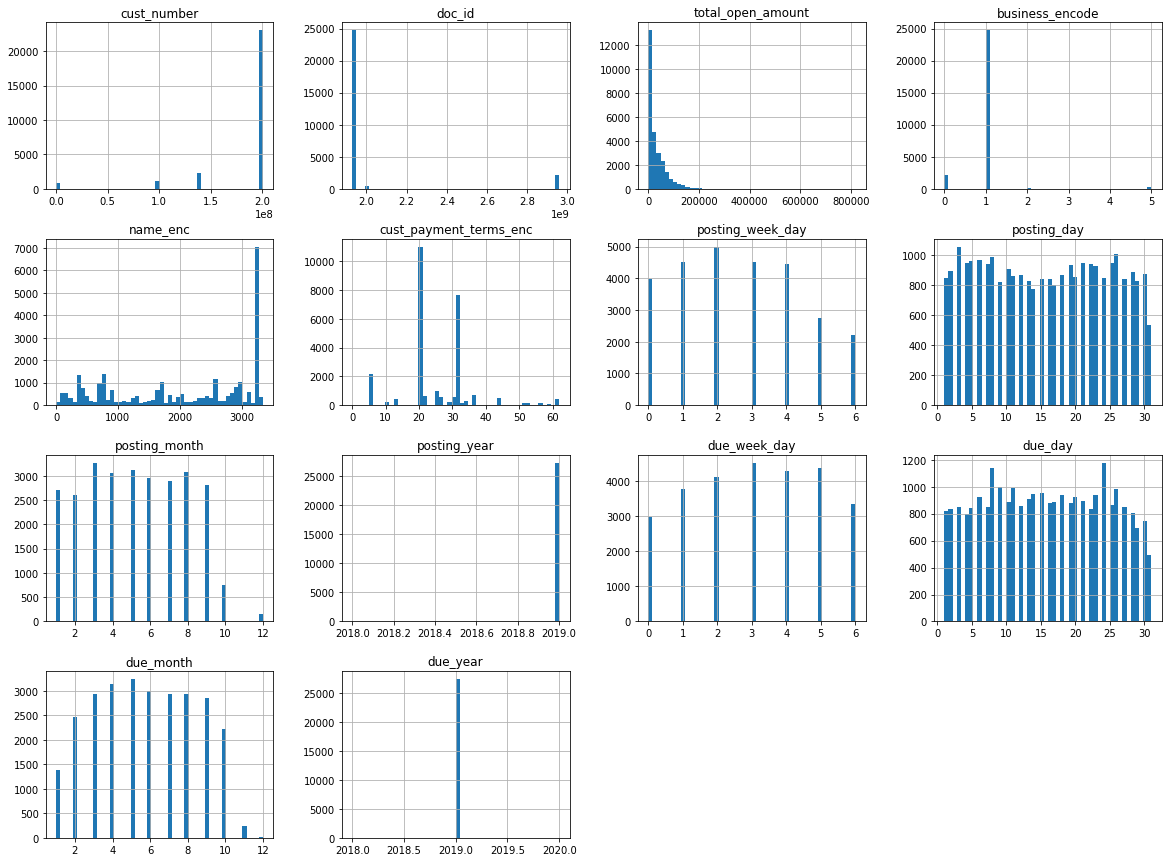

In [94]:
#Plotting the Histogram graphs for X_train
X_train.hist(bins = 50, figsize=(20,15))

In [95]:
#Plotting the heatmap of X_train with the series y_train(containing the due by columns) merged together(Pearson Correlation) 
#This is done to check the existing and intensity of the relationship

<AxesSubplot:title={'center':'Pearson Correlation'}>

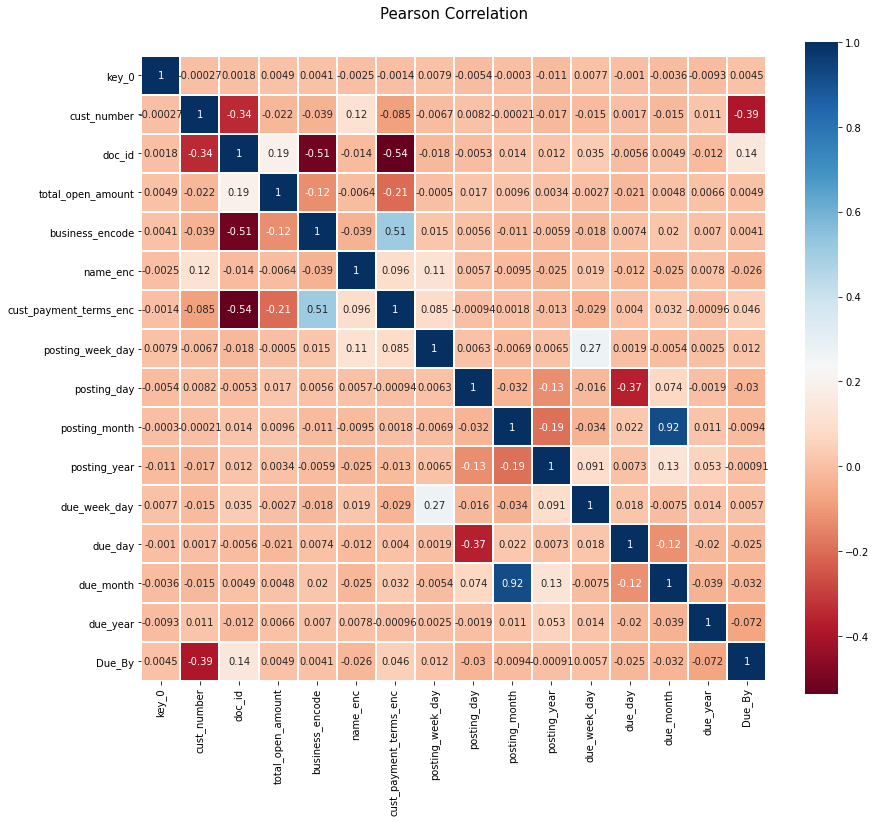

In [96]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation', y=1.05, size=15)

sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [97]:
#We can see that the cust_number have a very high relationship

In [98]:
#We are finding the Varience Threshold
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [99]:
#Seeing the variences 
sel.variances_

array([1.80952191e+15, 7.82897574e+16, 1.61280917e+09, 2.94629898e-01,
       1.26339048e+06, 1.14879232e+02, 3.31519514e+00, 7.93167848e+01,
       7.12577599e+00, 5.66348166e-03, 3.56824074e+00, 7.43273892e+01,
       7.19352869e+00, 3.28577742e-04])

# MODELLING !!

### Linear Regression Model 

In [100]:
from sklearn.linear_model import LinearRegression          #Importing the Linear Regression model
base_model = LinearRegression()                            #Setting a variable with the model
base_model.fit(X_train, y_train)                           #Fitting the model with X_train and y_train

LinearRegression()

In [101]:
y_predict = base_model.predict(X_val)         #We are predicting the Due_date on the validation set and keeping it n a variable

In [102]:
y_predict          #The predicted value

array([-1.76389807, -0.59870476, -0.35954195, ...,  6.35668105,
       -1.90886339, -1.8780581 ])

In [103]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, y_predict, squared=False)
#This the mean squared error of this model but when i use it on my final test set i am getting all prediction <0 

5.9928985036003715

### DECISION TREE REGRESSOR MODEL

In [104]:
from sklearn.tree import DecisionTreeRegressor            #Importing the DECISION TREE REGRESSOR MODEL
regressor = DecisionTreeRegressor(random_state=0 , max_depth=1)       #Setting a variable with the model

In [105]:
regressor.fit(X_train, y_train)                           #Fitting the model with X_train and y_train

DecisionTreeRegressor(max_depth=1, random_state=0)

In [106]:
y_predict2 = regressor.predict(X_val)         #We are predicting the Due_date on the validation set and keeping it  a variable

In [107]:
mean_squared_error(y_val, y_predict2, squared=False)  #This the mean squared error of this model

6.830938780180139

### RANDOM FOREST REGRESSOR MODEL

In [108]:
from sklearn.ensemble import RandomForestRegressor  #Importing the RANDOM FOREST REGRESSOR MODEL


In [109]:
regressor1 = RandomForestRegressor(n_estimators = 100, random_state = 0,max_depth = 2)  #Setting a variable with the model
#included are some hyper parameter tuning 
#n_estimators is the number of trees that we want to build before taking the averages of predictions
#max_depth represents the depth of each tree in the forest

In [110]:
regressor1.fit(X_train, y_train)     #Fitting the model with X_train and y_train

RandomForestRegressor(max_depth=2, random_state=0)

In [111]:
y_predict3 = regressor1.predict(X_val) #We are predicting the Due_date on the validation set and keeping it n a variable

In [112]:
mean_squared_error(y_val, y_predict3, squared=False) #This the mean squared error of this model

6.852131354516052

In [113]:
from sklearn.metrics import accuracy_score  #Importing to check the accuracy_score

In [114]:
predictions=[round(value) for value in y_predict3]   

In [115]:
accuracy=accuracy_score(y_val,predictions)
print("Accuracy: %.2f%%"%(accuracy*100.0))   #The accuracy of the model is 21.64

Accuracy: 21.64%


# I AM USING RANDOM FOREST REGRESSOR MODEL

###################################################

# PREDICTING ON VALIDATION

In [116]:
val_predict=pd.Series(y_predict3,name='Pred_delay') #We are making the series with the y_predict3

In [117]:
val_predict=val_predict.astype('int')  #changing it to int

In [118]:
X_val.shape, val_predict.shape

((5869, 14), (5869,))

In [119]:
X_val.reset_index(drop=True,inplace=True)

In [120]:
X_val = X_val.merge(val_predict , on = X_val.index )  #merging the Pred_delay with the main dataset
X_val

,key_0,cust_number,doc_id,total_open_amount,business_encode,name_enc,cust_payment_terms_enc,posting_week_day,posting_day,posting_month,posting_year,due_week_day,due_day,due_month,due_year,Pred_delay
0,0,200337148.0,1.929989e+09,109278.76,1,251,13,1,8,10,2019,2,23,10,2019,0
1,1,200769623.0,1.929969e+09,76740.83,1,1450,25,1,8,10,2019,2,23,10,2019,0
2,2,200803720.0,1.929981e+09,745.28,1,323,28,1,8,10,2019,3,24,10,2019,0
3,3,200760666.0,1.929977e+09,1426.81,1,657,13,1,8,10,2019,2,23,10,2019,0
4,4,200418007.0,1.929959e+09,2670.10,1,48,13,1,8,10,2019,2,23,10,2019,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5864,5864,200769623.0,1.930249e+09,28316.55,1,1443,25,0,9,12,2019,1,24,12,2019,0
5865,5865,100031704.0,1.930251e+09,52495.79,1,349,13,0,9,12,2019,1,24,12,2019,1
5866,5866,140104409.0,2.960599e+09,8060.31,0,770,4,0,9,12,2019,5,21,12,2019,6
5867,5867,200927099.0,1.930252e+09,11757.21,1,1348,13,0,9,12,2019,1,24,12,2019,0


In [121]:
#Merging the month day year to a complete date seperating by - 
cols=["due_year","due_month","due_day"]
X_val['due_date'] = X_val[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

In [122]:
#Changing the Data type of due_date column to datetype format
X_val['due_date']=pd.to_datetime(X_val['due_date'])

In [123]:
#Next we will add the Due_by to the due_date 

In [124]:
from datetime import date, timedelta

In [125]:
temp = X_val['Pred_delay'].apply(np.ceil).apply(lambda x: pd.Timedelta(x, unit='D'))
X_val['clear_date'] = X_val['due_date'] + temp

In [126]:
X_val.tail()

,key_0,cust_number,doc_id,total_open_amount,business_encode,name_enc,cust_payment_terms_enc,posting_week_day,posting_day,posting_month,posting_year,due_week_day,due_day,due_month,due_year,Pred_delay,due_date,clear_date
5864,5864,200769623.0,1.930249e+09,28316.55,1,1443,25,0,9,12,2019,1,24,12,2019,0,2019-12-24,2019-12-24
5865,5865,100031704.0,1.930251e+09,52495.79,1,349,13,0,9,12,2019,1,24,12,2019,1,2019-12-24,2019-12-25
5866,5866,140104409.0,2.960599e+09,8060.31,0,770,4,0,9,12,2019,5,21,12,2019,6,2019-12-21,2019-12-27
5867,5867,200927099.0,1.930252e+09,11757.21,1,1348,13,0,9,12,2019,1,24,12,2019,0,2019-12-24,2019-12-24
5868,5868,200748108.0,1.930254e+09,17107.14,1,741,13,0,9,12,2019,1,24,12,2019,0,2019-12-24,2019-12-24


# PREDICTION ON X TEST!!!

In [127]:
X_test.dtypes

cust_number               float64
doc_id                    float64
total_open_amount         float64
business_encode             int32
name_enc                    int32
cust_payment_terms_enc      int32
posting_week_day            int64
posting_day                 int64
posting_month               int64
posting_year                int64
due_week_day                int64
due_day                     int64
due_month                   int64
due_year                    int64
dtype: object

In [128]:
#X_test.drop('Pred_delay',axis=1,inplace=True)


In [129]:
#X_test.drop('key_0',axis=1,inplace=True)

In [130]:
X_test.dtypes

cust_number               float64
doc_id                    float64
total_open_amount         float64
business_encode             int32
name_enc                    int32
cust_payment_terms_enc      int32
posting_week_day            int64
posting_day                 int64
posting_month               int64
posting_year                int64
due_week_day                int64
due_day                     int64
due_month                   int64
due_year                    int64
dtype: object

In [131]:
y_predict_test = regressor1.predict(X_test)   #Predicting on the X_test

In [132]:
xtest_predict=pd.Series(y_predict_test,name='Pred_delay')   
#creating a series with the name Pred_delay baased on the result of the prediction on the X_test

In [133]:
#Changing the data type to int
xtest_predict=xtest_predict.astype('int')

In [134]:
X_test.shape,xtest_predict.shape

((5869, 14), (5869,))

In [135]:
xtest_predict

0       0
1       0
2       0
3       0
4       0
       ..
5864    0
5865    0
5866    0
5867    0
5868    0
Name: Pred_delay, Length: 5869, dtype: int32

In [136]:
#resetting index
X_test.reset_index(drop=True,inplace=True) 

In [137]:
#Merging the series with the main dataset showing the Pred_delay
X_test = X_test.merge(xtest_predict , on = X_test.index )
X_test

,key_0,cust_number,doc_id,total_open_amount,business_encode,name_enc,cust_payment_terms_enc,posting_week_day,posting_day,posting_month,posting_year,due_week_day,due_day,due_month,due_year,Pred_delay
0,0,200769623.0,1.930251e+09,26870.39,1,1452,29,0,9,12,2019,1,24,12,2019,0
1,1,200769623.0,1.930248e+09,45065.61,1,1452,29,0,9,12,2019,1,24,12,2019,0
2,2,200762301.0,1.930251e+09,23125.27,1,212,22,0,9,12,2019,1,24,12,2019,0
3,3,200769623.0,1.930252e+09,30931.15,1,1452,29,0,9,12,2019,1,24,12,2019,0
4,4,200705742.0,1.930250e+09,12250.26,1,394,10,0,9,12,2019,4,10,1,2020,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5864,5864,200704045.0,1.930572e+09,77636.21,1,1051,17,2,26,2,2020,3,12,3,2020,0
5865,5865,200466603.0,1.930565e+09,16036.29,1,1202,17,2,26,2,2020,3,12,3,2020,0
5866,5866,200739534.0,1.930581e+09,5434.31,1,937,17,3,27,2,2020,4,13,3,2020,0
5867,5867,200777735.0,1.930578e+09,141239.93,1,914,17,3,27,2,2020,4,13,3,2020,0


In [138]:
#Showing the number of the rows having the Pred_delay > 0 
(X_test['Pred_delay']>0).sum()

761

In [139]:
#Merging the month day year to a complete date seperating by - 
cols=["due_year","due_month","due_day"]
X_test['due_date'] = X_test[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

In [140]:
#Changing the Data type of due_date column to datetype format
X_test['due_date']=pd.to_datetime(X_test['due_date'])

In [141]:
from datetime import date, timedelta

In [142]:
#Next we will add the Pred_delay to the due_date 
temp = X_test['Pred_delay'].apply(np.ceil).apply(lambda x: pd.Timedelta(x, unit='D'))
X_test['clear_date'] = X_test['due_date'] + temp

In [143]:
X_test

,key_0,cust_number,doc_id,total_open_amount,business_encode,name_enc,cust_payment_terms_enc,posting_week_day,posting_day,posting_month,posting_year,due_week_day,due_day,due_month,due_year,Pred_delay,due_date,clear_date
0,0,200769623.0,1.930251e+09,26870.39,1,1452,29,0,9,12,2019,1,24,12,2019,0,2019-12-24,2019-12-24
1,1,200769623.0,1.930248e+09,45065.61,1,1452,29,0,9,12,2019,1,24,12,2019,0,2019-12-24,2019-12-24
2,2,200762301.0,1.930251e+09,23125.27,1,212,22,0,9,12,2019,1,24,12,2019,0,2019-12-24,2019-12-24
3,3,200769623.0,1.930252e+09,30931.15,1,1452,29,0,9,12,2019,1,24,12,2019,0,2019-12-24,2019-12-24
4,4,200705742.0,1.930250e+09,12250.26,1,394,10,0,9,12,2019,4,10,1,2020,0,2020-01-10,2020-01-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5864,5864,200704045.0,1.930572e+09,77636.21,1,1051,17,2,26,2,2020,3,12,3,2020,0,2020-03-12,2020-03-12
5865,5865,200466603.0,1.930565e+09,16036.29,1,1202,17,2,26,2,2020,3,12,3,2020,0,2020-03-12,2020-03-12
5866,5866,200739534.0,1.930581e+09,5434.31,1,937,17,3,27,2,2020,4,13,3,2020,0,2020-03-13,2020-03-13
5867,5867,200777735.0,1.930578e+09,141239.93,1,914,17,3,27,2,2020,4,13,3,2020,0,2020-03-13,2020-03-13


# MAIN TEST!!

In [144]:
test #this is the main test dataframe

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms,isOpen
0,U001,0200762301,C&S WH systems,NaT,1930715169.0,2020-03-29,2020-03-28,2020-06-02,7373.07,NAGD,1
3,U001,0200769623,WAL-MAR in,NaT,1930576642.0,2020-02-29,2020-02-28,2020-03-15,19774.48,NAH4,1
4,U001,0200769623,WAL-MAR corporation,NaT,1930822271.0,2020-04-27,2020-04-24,2020-05-12,294.17,NAH4,1
7,U001,0200769623,WAL-MAR us,NaT,1930740957.0,2020-04-04,2020-04-03,2020-04-19,32515.23,NAH4,1
10,U001,0100031704,DELHAIZE associates,NaT,1930803750.0,2020-04-20,2020-04-20,2020-05-05,85404.69,NAA8,1
...,...,...,...,...,...,...,...,...,...,...,...
49983,U001,0200762301,C&S WH foundation,NaT,1930760551.0,2020-04-09,2020-04-08,2020-04-24,49212.01,NAC6,1
49986,U001,0200756072,REINHA trust,NaT,1930820170.0,2020-04-24,2020-04-23,2020-05-09,20172.68,NAA8,1
49989,U001,0200769623,WAL-MAR corporation,NaT,1930820898.0,2020-04-23,2020-04-23,2020-05-08,57143.9,NAH4,1
49990,U001,0100036318,TFC in,NaT,1930760968.0,2020-04-08,2020-04-09,2020-04-18,29015.0,NA10,1


In [145]:
test.isna().sum() #where clear date is present 

business_code              0
cust_number                0
name_customer              0
clear_date              9691
doc_id                     0
posting_date               0
document_create_date       0
due_in_date                0
total_open_amount          0
cust_payment_terms         0
isOpen                     0
dtype: int64

### drop clear_date column as we are going to predict that 

In [146]:
X_main_test = test.drop(['clear_date'],axis=1)
X_main_test

# ALSO LETS DROP PRICE FROM MAIN TEST ITSELF
test.drop(['clear_date'], inplace =True,axis=1)

In [147]:
X_train.shape

(27388, 14)

In [148]:
X_main_test.shape

(9691, 10)

In [149]:
X_train.dtypes

cust_number               float64
doc_id                    float64
total_open_amount         float64
business_encode             int32
name_enc                    int32
cust_payment_terms_enc      int32
posting_week_day            int64
posting_day                 int64
posting_month               int64
posting_year                int64
due_week_day                int64
due_day                     int64
due_month                   int64
due_year                    int64
dtype: object

In [150]:
X_main_test.dtypes #here we can see we aagin need to change the dtypes using encoding to match with X_train
#The column names should be same
#the total number of columns should be same
#The order of columns should also be same

business_code                   object
cust_number                     object
name_customer                   object
doc_id                          object
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
total_open_amount               object
cust_payment_terms              object
isOpen                          object
dtype: object

# Mapping

In [151]:
#encoding business_code
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(X_main_test['business_code'])
X_main_test['business_encode'] = label.transform(X_main_test['business_code'])
X_main_test.drop(['business_code'],inplace=True,axis=1)



In [152]:
name_enc = LabelEncoder()

In [153]:
#Encoding name_customer
X_main_test['name_enc']=name_enc.fit_transform(X_main_test['name_customer'])


In [154]:
X_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9691 entries, 0 to 49996
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   cust_number           9691 non-null   object        
 1   name_customer         9691 non-null   object        
 2   doc_id                9691 non-null   object        
 3   posting_date          9691 non-null   datetime64[ns]
 4   document_create_date  9691 non-null   datetime64[ns]
 5   due_in_date           9691 non-null   datetime64[ns]
 6   total_open_amount     9691 non-null   object        
 7   cust_payment_terms    9691 non-null   object        
 8   isOpen                9691 non-null   object        
 9   business_encode       9691 non-null   int32         
 10  name_enc              9691 non-null   int32         
dtypes: datetime64[ns](3), int32(2), object(6)
memory usage: 832.8+ KB


In [155]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27388 entries, 2554 to 49785
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             27388 non-null  float64
 1   doc_id                  27388 non-null  float64
 2   total_open_amount       27388 non-null  float64
 3   business_encode         27388 non-null  int32  
 4   name_enc                27388 non-null  int32  
 5   cust_payment_terms_enc  27388 non-null  int32  
 6   posting_week_day        27388 non-null  int64  
 7   posting_day             27388 non-null  int64  
 8   posting_month           27388 non-null  int64  
 9   posting_year            27388 non-null  int64  
 10  due_week_day            27388 non-null  int64  
 11  due_day                 27388 non-null  int64  
 12  due_month               27388 non-null  int64  
 13  due_year                27388 non-null  int64  
dtypes: float64(3), int32(3), int64(8)
m

In [156]:
X_main_test['name_enc']=name_enc.fit_transform(X_main_test['name_customer'])
X_main_test.drop(['name_customer'],inplace=True,axis=1)

In [157]:
#Cust_payment_terms is encoded
X_main_test['cust_payment_terms_enc']=cust_payment_terms_enc.fit_transform(X_main_test['cust_payment_terms'])

In [158]:
#encoding of posting_date

X_main_test['posting_week_day']=X_main_test['posting_date'].dt.weekday
X_main_test['posting_day']=X_main_test['posting_date'].dt.day
X_main_test['posting_month']=X_main_test['posting_date'].dt.month
X_main_test['posting_year']=X_main_test['posting_date'].dt.year


#the original posting_date column is dropped
X_main_test.drop('posting_date',axis=1,inplace=True)

In [159]:
#encoding of due_in_date
X_main_test['due_week_day']=X_main_test['due_in_date'].dt.weekday
X_main_test['due_day']=X_main_test['due_in_date'].dt.day
X_main_test['due_month']=X_main_test['due_in_date'].dt.month
X_main_test['due_year']=X_main_test['due_in_date'].dt.year




In [160]:
#the original due_in _date column is dropped
X_main_test.drop('due_in_date',axis=1,inplace=True)

In [161]:
#encoding cutomer number
X_main_test['cust_number'] = X_main_test['cust_number'].str.replace(r'[^\d.]+', '')
X_main_test["cust_number"] = X_main_test["cust_number"].astype(float)

In [162]:
#isOpen is dropped
X_main_test.drop(['isOpen'],axis=1,inplace=True)

In [163]:
#Changing of Dtype of total_open_amount to float
X_main_test["total_open_amount"] = X_main_test["total_open_amount"].astype(float)

In [164]:
#Changing the dtype of doc_id to float
X_main_test["doc_id"] = X_main_test["doc_id"].astype(float)

In [165]:
#Dropping of the document_create_date
X_main_test.drop(['document_create_date'],inplace=True,axis=1)

In [166]:
#dropping of cust_payment_terms
X_main_test.drop(['cust_payment_terms'],inplace=True,axis=1)

In [167]:
X_main_test.info() #here we can see all featured of X_main_test is exactly same as that of X_train even the sequence

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9691 entries, 0 to 49996
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9691 non-null   float64
 1   doc_id                  9691 non-null   float64
 2   total_open_amount       9691 non-null   float64
 3   business_encode         9691 non-null   int32  
 4   name_enc                9691 non-null   int32  
 5   cust_payment_terms_enc  9691 non-null   int32  
 6   posting_week_day        9691 non-null   int64  
 7   posting_day             9691 non-null   int64  
 8   posting_month           9691 non-null   int64  
 9   posting_year            9691 non-null   int64  
 10  due_week_day            9691 non-null   int64  
 11  due_day                 9691 non-null   int64  
 12  due_month               9691 non-null   int64  
 13  due_year                9691 non-null   int64  
dtypes: float64(3), int32(3), int64(8)
memor

In [168]:
X_train.shape,X_main_test.shape

((27388, 14), (9691, 14))

In [169]:
X_main_test.sort_values(['posting_year','posting_month','posting_day'],inplace=True) #sorting the values of maintest set

# MAIN PREDICTION

In [170]:
X_main_test.dtypes

cust_number               float64
doc_id                    float64
total_open_amount         float64
business_encode             int32
name_enc                    int32
cust_payment_terms_enc      int32
posting_week_day            int64
posting_day                 int64
posting_month               int64
posting_year                int64
due_week_day                int64
due_day                     int64
due_month                   int64
due_year                    int64
dtype: object

In [171]:
y_main_test = regressor1.predict(X_main_test) #Predicting using the regressor1 of random forest tree regressor

In [172]:
y_main_test  #We can see the output series

array([-0.19269042, -0.19269042,  1.12212476, ..., -0.19269042,
        1.12212476,  1.12212476])

In [173]:
xmain_predict=pd.Series(y_main_test,name='Pred_delay')

In [174]:
xmain_predict=xmain_predict.astype('int') #changing datatype

In [175]:
X_main_test.shape,xmain_predict.shape

((9691, 14), (9691,))

In [176]:
X_main_test.reset_index(drop=True,inplace=True) #resetting index

In [177]:
test = test.merge(xmain_predict , on = test.index )
test #here we see that the Pred_delay column is added to the dataframe

,key_0,business_code,cust_number,name_customer,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms,isOpen,Pred_delay
0,0,U001,0200762301,C&S WH systems,1930715169.0,2020-03-29,2020-03-28,2020-06-02,7373.07,NAGD,1,0
1,3,U001,0200769623,WAL-MAR in,1930576642.0,2020-02-29,2020-02-28,2020-03-15,19774.48,NAH4,1,0
2,4,U001,0200769623,WAL-MAR corporation,1930822271.0,2020-04-27,2020-04-24,2020-05-12,294.17,NAH4,1,1
3,7,U001,0200769623,WAL-MAR us,1930740957.0,2020-04-04,2020-04-03,2020-04-19,32515.23,NAH4,1,0
4,10,U001,0100031704,DELHAIZE associates,1930803750.0,2020-04-20,2020-04-20,2020-05-05,85404.69,NAA8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9686,49983,U001,0200762301,C&S WH foundation,1930760551.0,2020-04-09,2020-04-08,2020-04-24,49212.01,NAC6,1,1
9687,49986,U001,0200756072,REINHA trust,1930820170.0,2020-04-24,2020-04-23,2020-05-09,20172.68,NAA8,1,6
9688,49989,U001,0200769623,WAL-MAR corporation,1930820898.0,2020-04-23,2020-04-23,2020-05-08,57143.9,NAH4,1,0
9689,49990,U001,0100036318,TFC in,1930760968.0,2020-04-08,2020-04-09,2020-04-18,29015.0,NA10,1,1


In [178]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9691 entries, 0 to 9690
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   key_0                 9691 non-null   int64         
 1   business_code         9691 non-null   object        
 2   cust_number           9691 non-null   object        
 3   name_customer         9691 non-null   object        
 4   doc_id                9691 non-null   object        
 5   posting_date          9691 non-null   datetime64[ns]
 6   document_create_date  9691 non-null   datetime64[ns]
 7   due_in_date           9691 non-null   datetime64[ns]
 8   total_open_amount     9691 non-null   object        
 9   cust_payment_terms    9691 non-null   object        
 10  isOpen                9691 non-null   object        
 11  Pred_delay            9691 non-null   int32         
dtypes: datetime64[ns](3), int32(1), int64(1), object(7)
memory usage: 946.4+ KB


In [179]:
test.head()

,key_0,business_code,cust_number,name_customer,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms,isOpen,Pred_delay
0,0,U001,0200762301,C&S WH systems,1930715169.0,2020-03-29,2020-03-28,2020-06-02,7373.07,NAGD,1,0
1,3,U001,0200769623,WAL-MAR in,1930576642.0,2020-02-29,2020-02-28,2020-03-15,19774.48,NAH4,1,0
2,4,U001,0200769623,WAL-MAR corporation,1930822271.0,2020-04-27,2020-04-24,2020-05-12,294.17,NAH4,1,1
3,7,U001,0200769623,WAL-MAR us,1930740957.0,2020-04-04,2020-04-03,2020-04-19,32515.23,NAH4,1,0
4,10,U001,0100031704,DELHAIZE associates,1930803750.0,2020-04-20,2020-04-20,2020-05-05,85404.69,NAA8,1,0


# predicting date of  main test set

In [180]:
from datetime import date, timedelta

In [181]:
#adding the pred delay to the due date in order to find out the estimated date
temp = test['Pred_delay'].apply(np.ceil).apply(lambda x: pd.Timedelta(x, unit='D'))
test['Predicted__payment_date'] = test['due_in_date'] + temp

In [182]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9691 entries, 0 to 9690
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   key_0                    9691 non-null   int64         
 1   business_code            9691 non-null   object        
 2   cust_number              9691 non-null   object        
 3   name_customer            9691 non-null   object        
 4   doc_id                   9691 non-null   object        
 5   posting_date             9691 non-null   datetime64[ns]
 6   document_create_date     9691 non-null   datetime64[ns]
 7   due_in_date              9691 non-null   datetime64[ns]
 8   total_open_amount        9691 non-null   object        
 9   cust_payment_terms       9691 non-null   object        
 10  isOpen                   9691 non-null   object        
 11  Pred_delay               9691 non-null   int32         
 12  Predicted__payment_date  9691 non-

In [183]:
test  #Dataframe Having the Predicted__payment_date

,key_0,business_code,cust_number,name_customer,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms,isOpen,Pred_delay,Predicted__payment_date
0,0,U001,0200762301,C&S WH systems,1930715169.0,2020-03-29,2020-03-28,2020-06-02,7373.07,NAGD,1,0,2020-06-02
1,3,U001,0200769623,WAL-MAR in,1930576642.0,2020-02-29,2020-02-28,2020-03-15,19774.48,NAH4,1,0,2020-03-15
2,4,U001,0200769623,WAL-MAR corporation,1930822271.0,2020-04-27,2020-04-24,2020-05-12,294.17,NAH4,1,1,2020-05-13
3,7,U001,0200769623,WAL-MAR us,1930740957.0,2020-04-04,2020-04-03,2020-04-19,32515.23,NAH4,1,0,2020-04-19
4,10,U001,0100031704,DELHAIZE associates,1930803750.0,2020-04-20,2020-04-20,2020-05-05,85404.69,NAA8,1,0,2020-05-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9686,49983,U001,0200762301,C&S WH foundation,1930760551.0,2020-04-09,2020-04-08,2020-04-24,49212.01,NAC6,1,1,2020-04-25
9687,49986,U001,0200756072,REINHA trust,1930820170.0,2020-04-24,2020-04-23,2020-05-09,20172.68,NAA8,1,6,2020-05-15
9688,49989,U001,0200769623,WAL-MAR corporation,1930820898.0,2020-04-23,2020-04-23,2020-05-08,57143.9,NAH4,1,0,2020-05-08
9689,49990,U001,0100036318,TFC in,1930760968.0,2020-04-08,2020-04-09,2020-04-18,29015.0,NA10,1,1,2020-04-19


In [184]:
(test['Pred_delay']>0).sum()

1123

# CREATING BUCKETS 

## Buckets are 0-15, 16-30, 31-45, 46-60, >60

In [185]:
#buckets function created to find out the buckets
def buckets(x):
    if x <= 15:
        return "0-15 Days"
    elif x <= 30:
        return "16-30 Days"
    elif x <= 45:
        return "31-45 Days"
    elif x <= 60:
        return "46-60 Days"
    else:
        return">60 Days"


In [186]:
#Using apply method on the Pred_delay column we will pass individual values to the functon buckets 
test['Pred_delay']=test['Pred_delay'].apply(lambda x: buckets(x)) 

In [187]:
#Renaming the Pred_delay column to Aging_buckets as in the final data frame we only need to predict the estimated clear date
#and the Buckets
test.rename(columns = {'Pred_delay':'Aging_Bucket'}, inplace = True)

In [188]:
test

,key_0,business_code,cust_number,name_customer,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms,isOpen,Aging_Bucket,Predicted__payment_date
0,0,U001,0200762301,C&S WH systems,1930715169.0,2020-03-29,2020-03-28,2020-06-02,7373.07,NAGD,1,0-15 Days,2020-06-02
1,3,U001,0200769623,WAL-MAR in,1930576642.0,2020-02-29,2020-02-28,2020-03-15,19774.48,NAH4,1,0-15 Days,2020-03-15
2,4,U001,0200769623,WAL-MAR corporation,1930822271.0,2020-04-27,2020-04-24,2020-05-12,294.17,NAH4,1,0-15 Days,2020-05-13
3,7,U001,0200769623,WAL-MAR us,1930740957.0,2020-04-04,2020-04-03,2020-04-19,32515.23,NAH4,1,0-15 Days,2020-04-19
4,10,U001,0100031704,DELHAIZE associates,1930803750.0,2020-04-20,2020-04-20,2020-05-05,85404.69,NAA8,1,0-15 Days,2020-05-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9686,49983,U001,0200762301,C&S WH foundation,1930760551.0,2020-04-09,2020-04-08,2020-04-24,49212.01,NAC6,1,0-15 Days,2020-04-25
9687,49986,U001,0200756072,REINHA trust,1930820170.0,2020-04-24,2020-04-23,2020-05-09,20172.68,NAA8,1,0-15 Days,2020-05-15
9688,49989,U001,0200769623,WAL-MAR corporation,1930820898.0,2020-04-23,2020-04-23,2020-05-08,57143.9,NAH4,1,0-15 Days,2020-05-08
9689,49990,U001,0100036318,TFC in,1930760968.0,2020-04-08,2020-04-09,2020-04-18,29015.0,NA10,1,0-15 Days,2020-04-19
